<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


C:\Users\tovin\AppData\Local\Temp\ipykernel_3644\1502206393.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], hist = False, kde = True,
C:\Users\tovin\Projects\venv\Dash\lib\site-packages\seaborn\distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


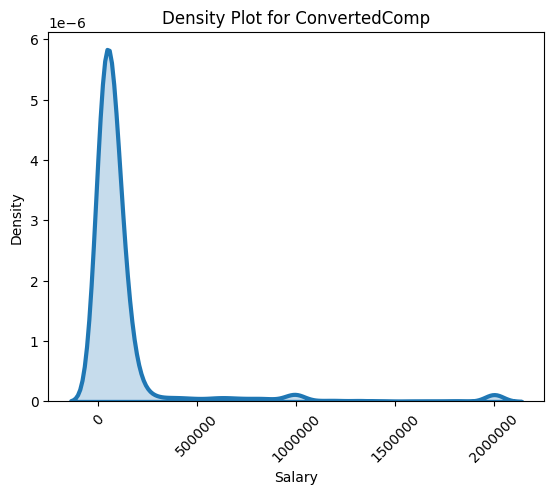

In [8]:
sns.distplot(df['ConvertedComp'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Density Plot for ConvertedComp')
plt.xlabel('Salary')
plt.ylabel('Density')

# Use plain style and set axis to 'x'
plt.ticklabel_format(style='plain', axis='x')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

Plot the histogram for the column `ConvertedComp`.


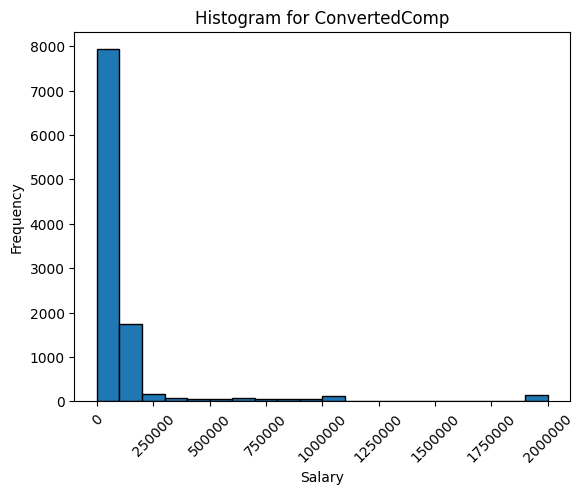

In [11]:
#Plot the histogram for the column ConvertedComp.

plt.hist(df['ConvertedComp'], bins=20, edgecolor='black')

plt.title('Histogram for ConvertedComp')
plt.xlabel('Salary')
plt.ylabel('Frequency')

# Use plain style and set axis to 'x'
plt.ticklabel_format(style='plain', axis='x')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

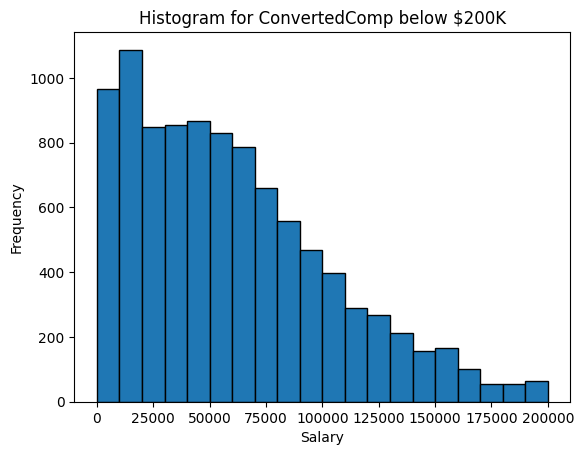

In [17]:
#For salaries only between 0 to 200K
filtered_df = df[(df['ConvertedComp'] >= 0) & (df['ConvertedComp'] <= 200000)]

plt.hist(filtered_df['ConvertedComp'], bins=20, edgecolor='black')

plt.title('Histogram for ConvertedComp below $200K')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

What is the median of the column `ConvertedComp`?


In [19]:
# What is the median of the column ConvertedComp?
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [23]:
#How many responders identified themselves only as a Man?
gender_counts = df['Gender'].value_counts()

num_men = gender_counts['Man']

print(f"The number of responders who identified themselves only as a Man is: {num_men}")

The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [24]:
# Find out the median ConvertedComp of responders identified themselves only as a Woman?
woman_df = df[df['Gender']=='Woman']
median_woman_salary = woman_df['ConvertedComp'].median()

print(f"The median salary of woman is: {median_woman_salary}")


The median salary of woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [25]:
# Give the five number summary for the column Age?
# Hint: min,q1,median,q3,max of a column are its five number summary.

df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [38]:
#q1 is 25%
#median is the 50% or:
median_age = df['Age'].median()

print(f"The median age of survey respondents is: {median_age}")

The median age of survey respondents is: 29.0


Plot a histogram of the column `Age`.


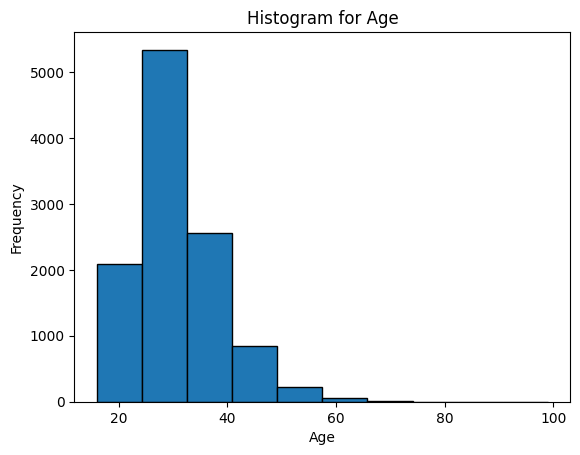

In [26]:
# Plot a histogram of the column Age.
plt.hist(df['Age'].dropna(), bins=10, edgecolor='black')

plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


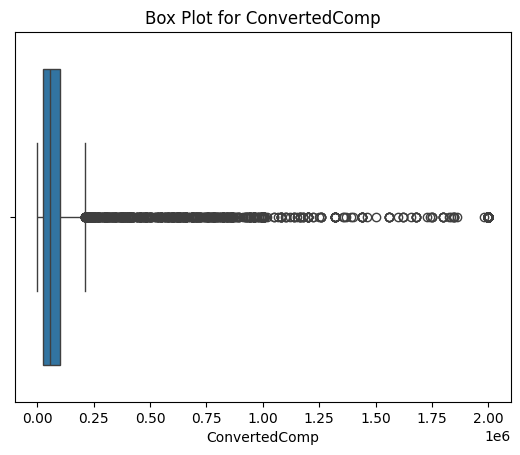

In [27]:
# Find out if outliers exist in the column ConvertedComp using a box plot?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['ConvertedComp'])

plt.title('Box Plot for ConvertedComp')
plt.xlabel('ConvertedComp')

plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [28]:
# Find out the Inter Quartile Range for the column ConvertedComp
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

print(f"The Inter Quartile Range for the 'ConvertedComp' column is: {IQR}")

The Inter Quartile Range for the 'ConvertedComp' column is: 73132.0


Find out the upper and lower bounds.


In [29]:
# Find out the upper and lower bounds.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"The lower bound for the 'ConvertedComp' column is: {lower_bound}")
print(f"The upper bound for the 'ConvertedComp' column is: {upper_bound}")

The lower bound for the 'ConvertedComp' column is: -82830.0
The upper bound for the 'ConvertedComp' column is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [32]:
# Identify how many outliers are there in the ConvertedComp column.

outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

num_outliers = outliers.shape[0]

print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")

The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [33]:
# Create a new dataframe by removing the outliers from the ConvertedComp column.
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [34]:
df_no_outliers.shape

(9703, 85)

In [39]:
df_no_outliers.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


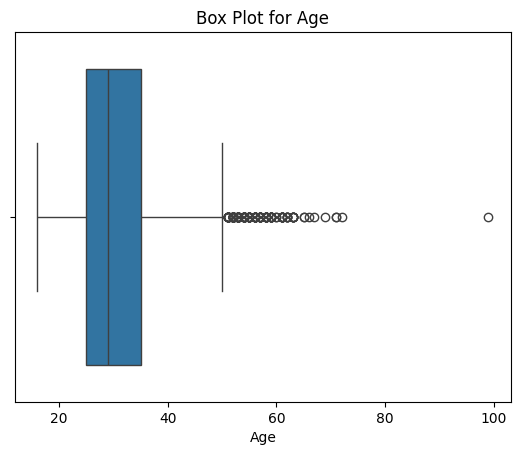

In [40]:
# Draw a box plot of 'Age'

sns.boxplot(x=df['Age'])

plt.title('Box Plot for Age')
plt.xlabel('Age')

plt.show()

In [41]:
Q1 = df['Age'].quantile(0.25)
IQR = df['Age'].quantile(0.75) - Q1

lower_bound = Q1 - 1.5 * IQR

# Create a Boolean Series where True indicates the row is an outlier below Q1
outliers_below_Q1 = df['Age'] < lower_bound

# Count the number of outliers below Q1
num_outliers_below_Q1 = outliers_below_Q1.sum()

print(f"The number of outliers below Q1 in the 'Age' column is: {num_outliers_below_Q1}")

The number of outliers below Q1 in the 'Age' column is: 0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [36]:
# Find the correlation between Age and all other numerical columns.

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation
correlation = numeric_df.corr()['Age']

print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
